In [1]:
import numpy as np
import os
from sklearn.feature_selection import mutual_info_regression

wd = 'trained_encoders/encoder_repeats_1000'
vc_raw = []
std_raw = []
mi = []
y_preds_raw = []
for i in range(150):
  vc_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'vc_raw.csv'), delimiter=',')
  std_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'std_raw.csv'), delimiter=',')
  #y_pred = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'y_pred_raw.csv'), delimiter=' ')
  #mi_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'voxel_mi.csv'))
  vc_raw.append(vc_temp)
  std_raw.append(std_temp)
  #y_preds_raw.append(y_pred)
  print(f"{i+1:04}", end='\r') # takes about 50 seconds with print statement not including loading y_preds
  #mi.append(mi_temp)

In [2]:
import numpy as np
import os
from sklearn.feature_selection import mutual_info_regression

wd = 'trained_encoders/encoder_repeats_1000'
vc = []
std = []
mi = []
y_preds = []
for i in range(1000):
  vc_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'voxel_corr.csv'), delimiter=',')
  std_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'voxel_std.csv'), delimiter=',')
  #y_pred = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'y_pred.csv'), delimiter=' ')
  #mi_temp = np.loadtxt(os.path.join(wd, 'test_' + f"{i+1:04}", 'voxel_mi.csv'))
  vc.append(vc_temp)
  std.append(std_temp)
  #y_preds.append(y_pred)
  print(f"{i+1:04}", end='\r') # takes about 50 seconds with print statement not including loading y_preds
  #mi.append(mi_temp)

In [3]:
vc = np.array(vc)
std = np.array(std)
# y_preds = np.array(y_preds)
#mi = np.array(mi)
print(vc.shape)
print(std.shape)
# print(y_preds.shape)
vc_mean = np.mean(vc, axis=0)
std_mean = np.mean(std, axis=0)
NUM_VOXELS = vc.shape[-1]
#mi_mean = np.mean(mi, axis=0)

(150, 4643)
(150, 4643)


In [4]:
vc_raw = np.array(vc_raw)
std_raw = np.array(std_raw)
# y_preds_raw = np.array(y_preds_raw)
#mi = np.array(mi)
print(vc_raw.shape)
print(std_raw.shape)
# print(y_preds_raw.shape)
vc_raw_mean = np.mean(vc_raw, axis=0)
std_raw_mean = np.mean(std_raw, axis=0)
NUM_VOXELS = vc.shape[-1]
#mi_mean = np.mean(mi, axis=0)

(150, 4643)
(150, 4643)


(4643,)


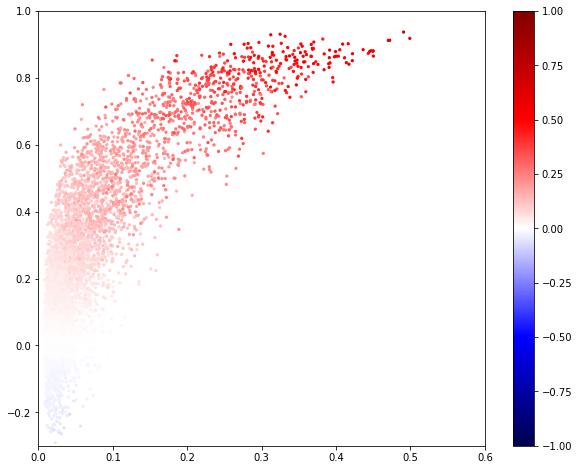

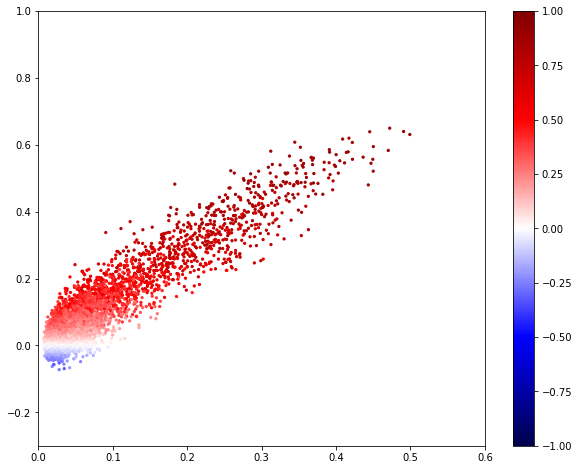

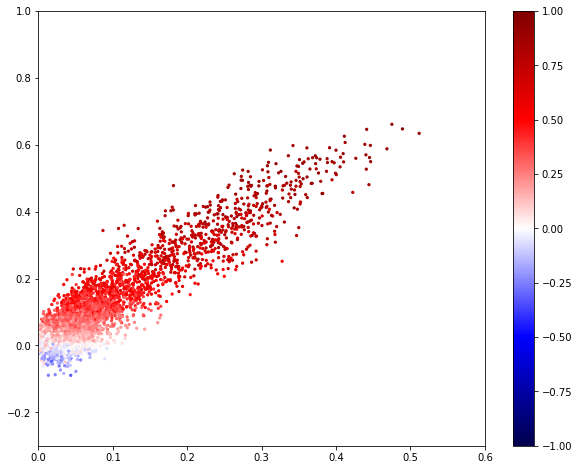

In [5]:
from matplotlib import colors
import matplotlib.pyplot as plt
divnorm =colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
print(std_mean.shape)
plt.figure(figsize=(10, 8))
plt.scatter(std_mean, vc_mean, s=5, cmap='seismic', c=vc_raw_mean, norm=divnorm)
#plt.plot(np.linspace(-0.3, 1), np.linspace(-0.3, 1))
plt.xlim(0, 0.6)
plt.ylim(-0.3, 1)
plt.colorbar()
plt.figure(figsize=(10, 8))
plt.scatter(std_mean, vc_raw_mean, s=5, cmap='seismic', c=vc_mean, norm=divnorm)
#plt.plot(np.linspace(-0.3, 1), np.linspace(-0.3, 1))
plt.xlim(0, 0.6)
plt.ylim(-0.3, 1)
plt.colorbar()
plt.figure(figsize=(10, 8))
plt.scatter(std_raw[0], vc_raw[0], s=5, cmap='seismic', c=vc_mean, norm=divnorm)
#plt.plot(np.linspace(-0.3, 1), np.linspace(-0.3, 1))
plt.xlim(0, 0.6)
plt.ylim(-0.3, 1)
plt.colorbar()
plt.show()

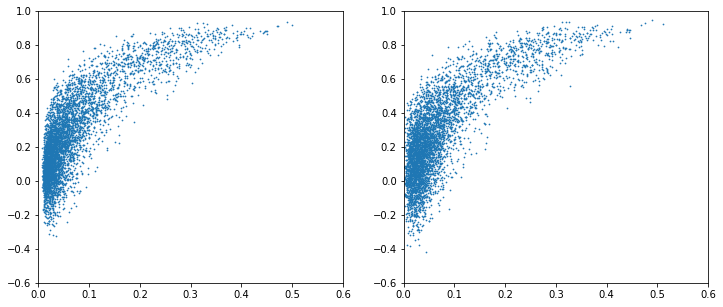

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
#plt.hexbin(std_mean, vc_mean, cmap='Blues', gridsize=50, bins='log', vmax='50')
plt.scatter(std_mean, vc_mean, s=0.5)
plt.xlim(0, 0.6)
plt.ylim(-0.6, 1)
plt.subplot(1, 2, 2)
#plt.hexbin(std[0], vc[0], cmap='Blues', gridsize=50, bins='log', vmax='50')
plt.scatter(std[0], vc[0], s=0.5)
plt.xlim(0, 0.6)
plt.ylim(-0.6, 1)
plt.show()

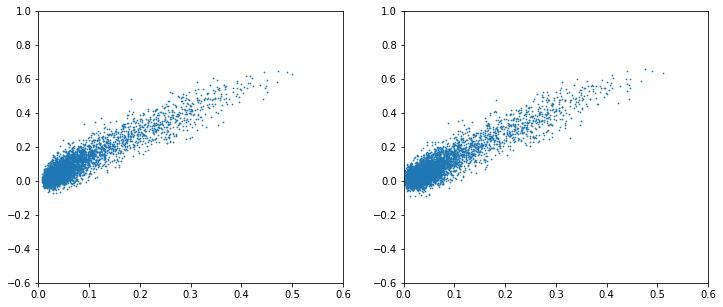

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(std_raw_mean, vc_raw_mean, s=0.5)
plt.xlim(0, 0.6)
plt.ylim(-0.6, 1)
plt.subplot(1, 2, 2)
plt.scatter(std_raw[0], vc_raw[0], s=0.5)
plt.xlim(0, 0.6)
plt.ylim(-0.6, 1)
plt.show()

3206


(0.0, 0.1)

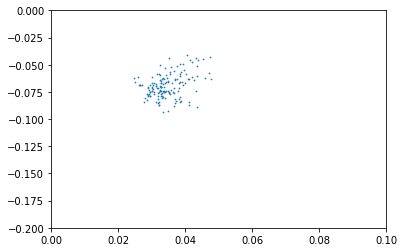

In [7]:
v = np.argmin(vc_mean)
print(v)
plt.scatter(std_raw[:, v], vc_raw[:, v], s=0.5)
plt.ylim(-0.2, 0)
plt.xlim(0, 0.1)

In [10]:
from KamitaniData.kamitani_data_handler import kamitani_data_handler as data_handler
import config_file
handler = data_handler(matlab_file = config_file.kamitani_data_mat)
Y,Y_test,Y_test_avg = handler.get_data(roi = 'ROI_VC',imag_data = 0, normalize=1, scale='standard', remove_outliers=0)
y_test = Y_test_avg
#plt.scatter(np.broadcast_to(y_test[:, v], (1000, 50)), y_preds[:, :, v], s=0.5)
plt.bar(np.arange(50), y_test[:, v])
plt.bar(np.arange(50), np.mean(y_preds[:, :, v], axis=0))
plt.show()


NameError: name 'v' is not defined

(-0.34914862361287746, 0.012949058272975655)
-0.04286036847868617
-0.01636648228644801
-0.03086626218211197


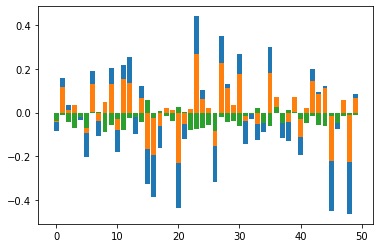

0.032418165233731165


In [ ]:
from scipy import stats
print(stats.pearsonr(np.mean(y_preds[:, :, v], axis=0), y_test[:, v]))
print(np.mean(Y[:, v]))
print(np.mean(y_test[:, v]))
print(np.mean(y_preds[:, :, v]))
y_raw,Y_test_raw,Y_test_avg_raw = handler.get_data(roi = 'ROI_VC',imag_data = 0, normalize=0, scale='standard', remove_outliers=0)
y_test_raw = Y_test_avg_raw
plt.bar(np.arange(50), y_test[:, v])
plt.bar(np.arange(50), y_test_raw[:, v])
plt.bar(np.arange(50), np.mean(y_preds[:, :, v], axis=0))
plt.show()


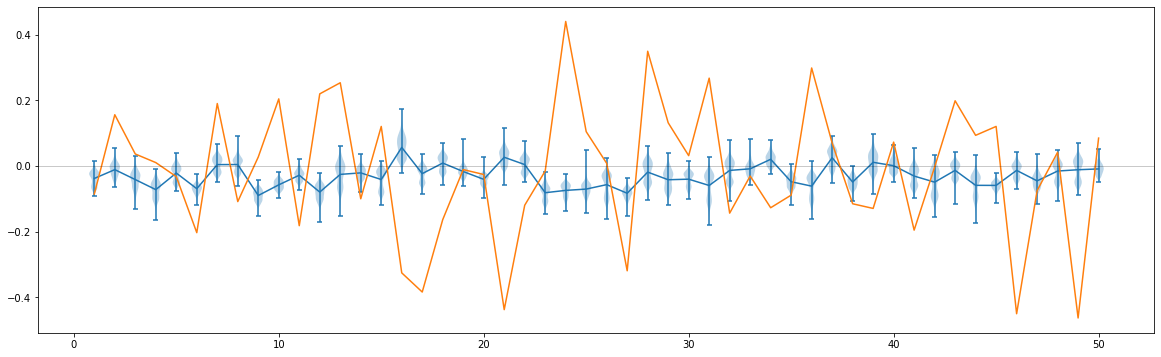

In [ ]:
plt.figure(figsize=(20, 6))
plt.violinplot(y_preds[:,:, v], showextrema=True)
#plt.scatter(np.arange(1, 51), y_test[:, v], c='tab:orange', s=10)
plt.plot(np.arange(1, 51), np.mean(y_preds[:, :, v], axis=0), c='tab:blue')
plt.plot(np.arange(1, 51), y_test[:, v], c='tab:orange')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.7)
plt.show()

In [ ]:
train_mean = np.broadcast_to(np.mean(Y, axis=0), shape=y_test.shape)
y_preds_naive = []
vc_naive = []
std_naive = []
for i in range(1000):
  temp = np.add(train_mean, np.random.normal(0, 0.03, y_pred.shape))
  y_preds_naive.append(temp)
  std_naive.append(np.std(temp, axis=0))
  vc_temp = []
  for k in range(NUM_VOXELS):
    vc_temp.append(stats.pearsonr(temp[:, k], y_test[:, k])[0])
  vc_naive.append(vc_temp)
vc_naive = np.array(vc_naive)
std_naive = np.array(std_naive)
print(vc_naive.shape)
print(std_naive.shape)


(1000, 4643)
(1000, 4643)


[[ 1.         -0.34914862]
 [-0.34914862  1.        ]]


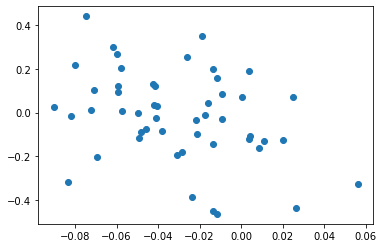

In [ ]:
plt.scatter(np.mean(y_preds[:, :, v], axis=0), y_test[:, v])
#plt.plot(np.arange())
print(np.corrcoef(np.mean(y_preds[:, :, v], axis=0), y_test[:, v]))
plt.show()

-4.736618689132819e-05


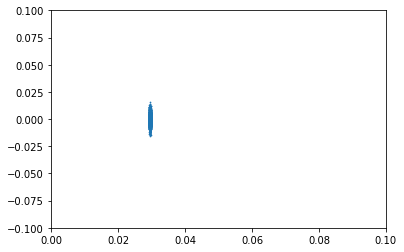

In [ ]:
vc_naive_mean = np.mean(vc_naive, axis=0)
std_naive_mean = np.mean(std_naive, axis=0)
print(np.mean(vc_naive_mean))
plt.scatter(std_naive_mean, vc_naive_mean, s=0.5)
plt.ylim(-0.1, 0.1)
plt.xlim(0, 0.1)
plt.show()


-0.3251252417917363


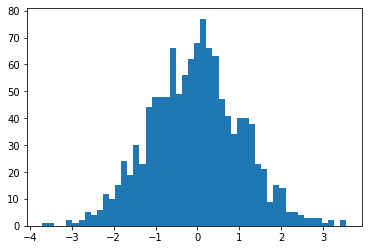

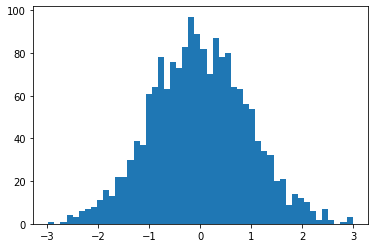

In [23]:
bv = np.argmin(vc_mean)
print(vc_mean[bv])
plt.hist(Y[:, bv], bins=50)
plt.show()
plt.hist(Y_test[:, bv], bins=50)
plt.show()

0.9369009276455429
1426
(1200, 4643)


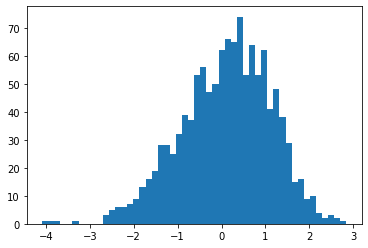

In [13]:
gv = np.argmax(vc_mean)
print(vc_mean[gv])
print(gv)
print(Y.shape)
plt.hist(Y[:, gv], bins=50)
plt.show()

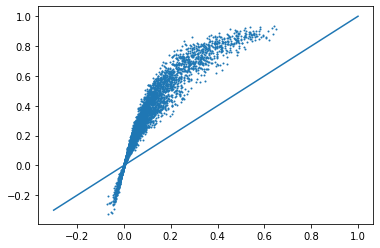

In [19]:
plt.scatter(vc_raw_mean, vc_mean, s=1)
plt.plot(np.linspace(-0.3, 1), np.linspace(-0.3, 1))
plt.show()